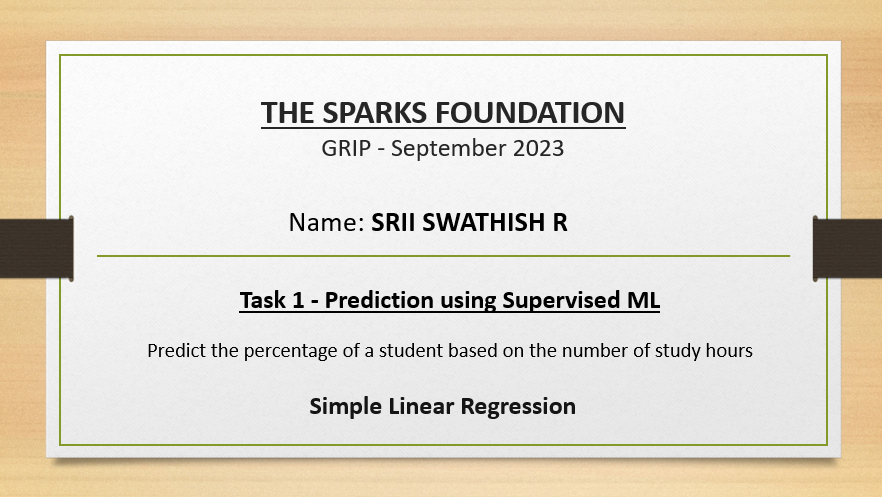

#### Using simple linear regression, we predict the score of a student who studies for 9.25 hours a day.

### Step 1: Loading all the required libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Step 2: Loading the dataset

In [134]:
data = pd.read_csv("Task-1_Supervised ML.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step 3: Using scatter plot distribution to check for linearity of data

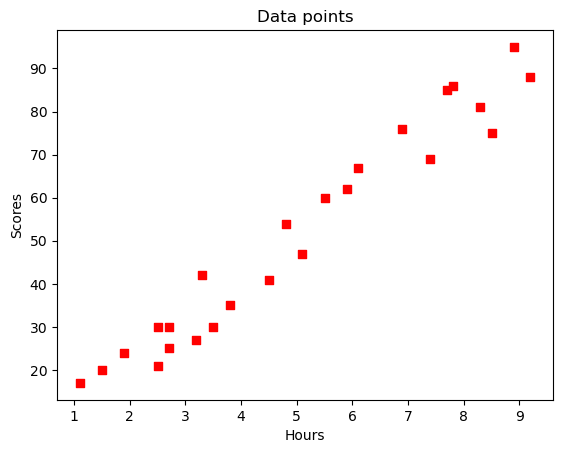

In [135]:
plt.scatter(x = data['Hours'], y = data['Scores'], color='red', marker='s')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Data points')
plt.show()

#### It can be observed that there exists a linear relationship between the Hours and Scores variables

### Step 4: Checking for data correlation using heatmap

<Axes: >

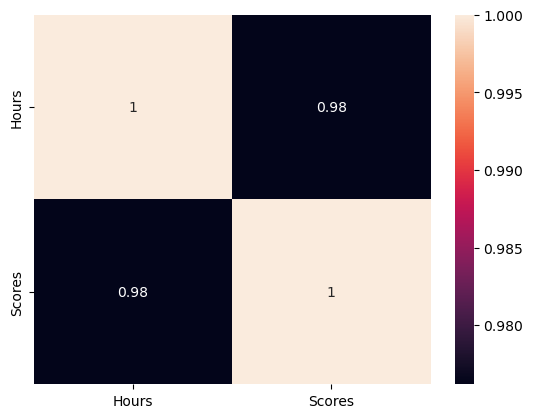

In [136]:
correlation = data.corr()
sns.heatmap(correlation,annot=True)

#### It can be observed that there is a strong positive correlation between the Hours and Scores variables

### Step 5: Extracting all the feature and label values

In [137]:
features=np.array(data['Hours'])
features=features.reshape(-1, 1)
labels=np.array(data['Scores'])

In [138]:
features

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [139]:
labels

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Step 6: Splitting the labels and features into training and testing data

In [140]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.2,random_state=50)

### Step 7: Training the Linear regression model 

In [141]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression()

### Step 8: Plotting the regression line alongside the data points

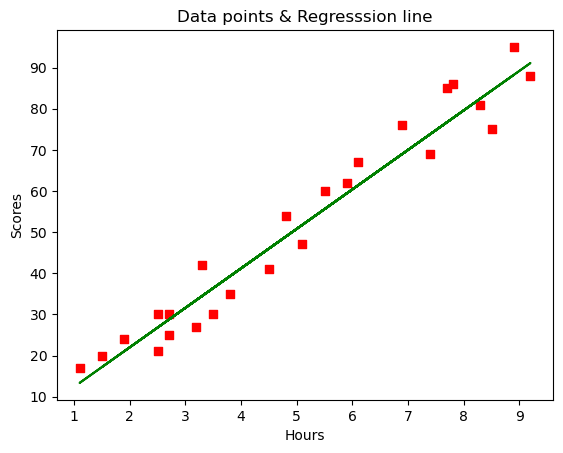

In [142]:
line = lin_reg.coef_*features+lin_reg.intercept_
plt.scatter(features,labels,color='red', marker= 's')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Data points & Regresssion line')
plt.plot(features,line,color='green')
plt.show()

### STEP 9: Predicting the scores using the hours given in test data

In [143]:
print(test_features)
pred=lin_reg.predict(test_features)
pred

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

### Step 10: Comparing the actual and predicted test scores of the test data

In [144]:
comparison = pd.DataFrame({'Actual Scores':test_labels,'Predicted Scores':pred})
comparison.head()

,Actual Scores,Predicted Scores
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


### Step 11: Checking for MAE, MAPE and Accuracy

In [145]:
errors = abs(pred - test_labels)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, pred )) 
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, pred )) 
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.5916495300630285
Mean Absolute Percentage Error: 0.10838399935533075
Accuracy: 89.16 %.


### Step 12: Predicting the score using the hours of study given in the question

In [146]:
hours = 9.25
prediction = lin_reg.predict([[hours]])

In [147]:
print('Given hours of study:', hours)
print('Predicted Score:', prediction)


Given hours of study: 9.25
Predicted Score: [91.56986604]


### ----- End of Code -----